# Summary of experiments

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys, time, pickle

sys.path.insert(1, '../../src/')
from aux import *

plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams["figure.figsize"]=15,7.5
plt.rcParams.update({'font.size': 40})
fig_path='fig/'
fig_path='../../../madmix-tex/fig/'

In [249]:
########################
########################
#     load results    #
########################
########################

# mad mix
madmix_elbos=pkl_load('results/madmix_elbos_toydiscrete')
madmix_elbos=np.hstack((madmix_elbos,pkl_load('results/madmix_elbos_ising')))
madmix_elbos=np.hstack((madmix_elbos,pkl_load('results/madmix_elbos_gmm')))
madmix_elbos=np.hstack((madmix_elbos,pkl_load('results/madmix_elbos_sas')))
madmix_elbos=madmix_elbos[-madmix_elbos<np.inf]

madmix_cput=pkl_load('results/madmix_cput_toydiscrete')
madmix_cput=np.hstack((madmix_cput,pkl_load('results/madmix_cput_ising')))
madmix_cput=np.hstack((madmix_cput,pkl_load('results/madmix_cput_gmm')))
madmix_cput=np.hstack((madmix_cput,pkl_load('results/madmix_cput_sas')))


# gibbs
gibbs_elbos=pkl_load('results/gibbs_elbos_toydiscrete')
gibbs_elbos=np.hstack((gibbs_elbos,pkl_load('results/gibbs_elbos_ising')))
gibbs_elbos=gibbs_elbos[-gibbs_elbos<np.inf]

gibbs_cput=pkl_load('results/gibbs_cput_toydiscrete')
gibbs_cput=np.hstack((gibbs_cput,pkl_load('results/gibbs_cput_ising')))
gibbs_cput=np.hstack((gibbs_cput,pkl_load('results/gibbs_cput_gmm')))
gibbs_cput=np.hstack((gibbs_cput,pkl_load('results/gibbs_cput_sas')))


# mean field
meanfield_elbos=pkl_load('results/meanfield_elbos_toydiscrete')
meanfield_elbos=np.hstack((meanfield_elbos,pkl_load('results/meanfield_elbos_ising')))
meanfield_elbos=np.hstack((meanfield_elbos,pkl_load('results/meanfield_elbos_gmm')))
meanfield_elbos=np.hstack((meanfield_elbos,pkl_load('results/meanfield_elbos_sas')))
meanfield_elbos=meanfield_elbos[-meanfield_elbos<np.inf]

meanfield_cput=pkl_load('results/meanfield_cput_toydiscrete')
meanfield_cput=np.hstack((meanfield_cput,pkl_load('results/meanfield_cput_ising')))
meanfield_cput=np.hstack((meanfield_cput,pkl_load('results/meanfield_cput_gmm')))
meanfield_cput=np.hstack((meanfield_cput,pkl_load('results/meanfield_cput_sas')))


# dequantization
dequant_elbos=pkl_load('results/dequant_elbos_toydiscrete')
dequant_elbos=np.vstack((dequant_elbos,pkl_load('results/dequant_elbos_ising')))
dequant_elbos=np.vstack((dequant_elbos,pkl_load('results/dequant_elbos_gmm')))
dequant_elbos=np.vstack((dequant_elbos,pkl_load('results/dequant_elbos_sas')))

dequant_cput=pkl_load('results/dequant_cput_toydiscrete')
dequant_cput=np.vstack((dequant_cput,pkl_load('results/dequant_cput_ising')))
dequant_cput=np.vstack((dequant_cput,pkl_load('results/dequant_cput_gmm')))
dequant_cput=np.vstack((dequant_cput,pkl_load('results/dequant_cput_sas')))

dequant_density_cput = pkl_load('results/dequant_densitycput_toydiscrete')
dequant_density_cput = np.vstack((dequant_density_cput,pkl_load('results/dequant_densitycput_ising')))
dequant_density_cput = np.vstack((dequant_density_cput,pkl_load('results/dequant_densitycput_gmm')))
dequant_density_cput = np.vstack((dequant_density_cput,pkl_load('results/dequant_densitycput_sas')))


# concrete
concrete_elbos=pkl_load('results/concrete_elbos_toydiscrete')
concrete_elbos=np.vstack((concrete_elbos,pkl_load('results/concrete_elbos_ising')[np.newaxis,:]))
concrete_elbos=np.vstack((concrete_elbos,pkl_load('results/concrete_elbos_gmm')))
concrete_elbos=np.vstack((concrete_elbos,pkl_load('results/concrete_elbos_sas')))

concrete_cput=pkl_load('results/concrete_cput_toydiscrete')
concrete_cput=np.vstack((concrete_cput,pkl_load('results/concrete_cput_ising')[np.newaxis,:]))
concrete_cput=np.vstack((concrete_cput,pkl_load('results/concrete_cput_gmm')))
concrete_cput=np.vstack((concrete_cput,pkl_load('results/concrete_cput_sas')))

concrete_density_cput = pkl_load('results/concrete_densitycput_toydiscrete')
concrete_density_cput = np.vstack((concrete_density_cput,pkl_load('results/concrete_densitycput_ising')))
concrete_density_cput = np.vstack((concrete_density_cput,pkl_load('results/concrete_densitycput_gmm')))
concrete_density_cput = np.vstack((concrete_density_cput,pkl_load('results/concrete_densitycput_sas')))

## Together

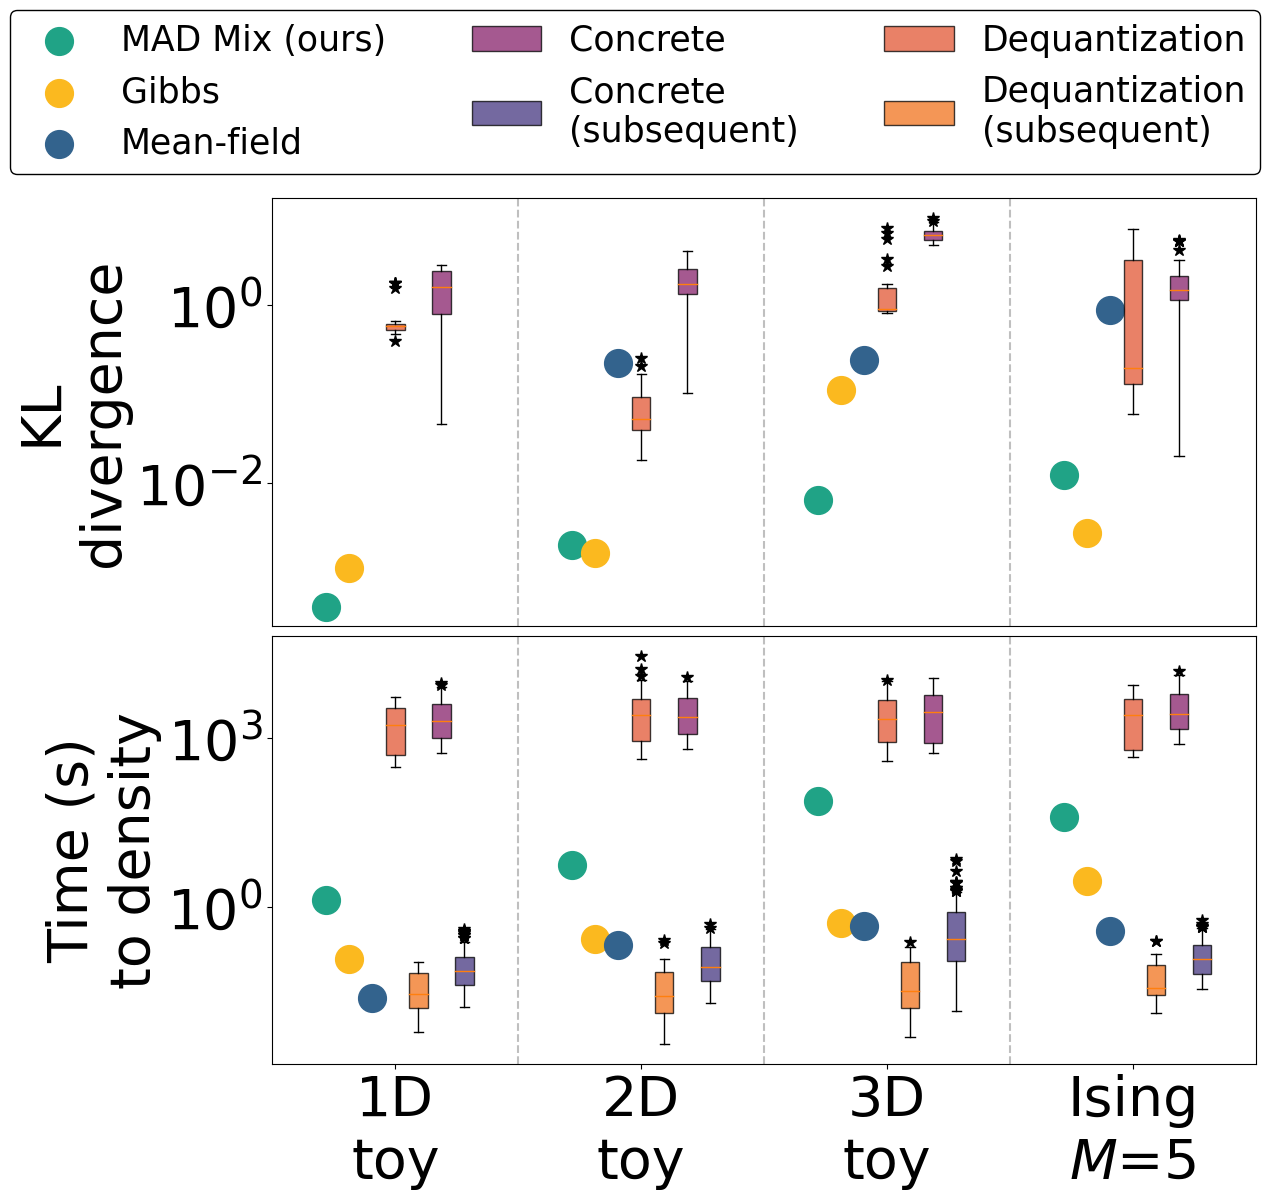

In [3]:
########################
########################
#      PLOTTING       #
########################
########################

# settings
fig, axs = plt.subplots(2,1, figsize=(12.5,10), constrained_layout=True)
flierprops = dict(marker='*', markerfacecolor='k', markersize=9,
                  linestyle='none', markeredgecolor='k')

increase=2
offset=0.25
marker_size=400

mad_offset=-2.25
gibbs_offset=-1.5
meanfield_offset=-0.75
dequant_offset=0.
dequant_density_offset=0.75
concrete_offset=1.5
concrete_density_offset=2.25

########################
########################
#      elbos plot      #
########################
########################

bps = [None for i in range(4)]
dequant_bps = [None for i in range(4)]
for i in range(4):
    axs[0].scatter([i*increase+mad_offset*offset],[-madmix_elbos[i]],s=marker_size,c='#20A386FF')
    axs[0].scatter([i*increase+gibbs_offset*offset],[-gibbs_elbos[i]],s=marker_size,c='#FBB91FFF')
    if i>0: axs[0].scatter([i*increase+meanfield_offset*offset],[-meanfield_elbos[i]],s=marker_size,c='#33638D')
    
    conc_tmp=np.copy(concrete_elbos[i,:])
    conc_tmp=conc_tmp[-conc_tmp<np.inf]
    bps[i]=axs[0].boxplot(-conc_tmp,positions=[i*increase+concrete_offset*offset], 
                          patch_artist=True, flierprops=flierprops)
    
    dequant_tmp=np.copy(dequant_elbos[i,:])
    dequant_tmp=dequant_tmp[-dequant_tmp<np.inf]
    dequant_bps[i]=axs[0].boxplot(-dequant_tmp,positions=[i*increase+dequant_offset*offset], 
                                  patch_artist=True, flierprops=flierprops)
# end for


# fill dequantization boxplots with colors
colors = ['#E25734' for i in range(4)]
i=0
for bplot in (dequant_bps[0],dequant_bps[1],dequant_bps[2],dequant_bps[3]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Dequantization')
        i=i+1
# end for


# fill concrete boxplots with colors
colors = ['#87216BFF' for i in range(4)]
i=0
for bplot in (bps[0],bps[1],bps[2],bps[3]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Concrete')
        i=i+1
# end for
        
axs[0].set_ylabel('KL\ndivergence')
axs[0].set_yscale('log')
axs[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off



########################
########################
#    cpu times plot    #
########################
########################
plt.rcParams["legend.framealpha"]=1
plt.rcParams["legend.edgecolor"]='black'

dequant_bps = [None for i in range(4)]
dequant_bpsbis = [None for i in range(4)]

bps = [None for i in range(4)]
bpsbis = [None for i in range(4)]
for i in range(4):
    axs[1].scatter([i*increase+mad_offset*offset],[madmix_cput[i]],s=marker_size,c='#20A386FF',
                   label='MAD Mix (ours)' if i == 0 else '')
    axs[1].scatter([i*increase+gibbs_offset*offset],[gibbs_cput[i]],s=marker_size,c='#FBB91FFF',
                   label='Gibbs' if i == 0 else '')
    axs[1].scatter([i*increase+meanfield_offset*offset],[meanfield_cput[i]],s=marker_size,c='#33638D',
                   label='Mean-field' if i == 0 else '')
    
    conc_tmp=np.copy(concrete_cput[i,:])
    conc_tmp=conc_tmp[conc_tmp>0]
    bps[i]=axs[1].boxplot(conc_tmp,positions=[i*increase+concrete_offset*offset], 
                          patch_artist=True, flierprops=flierprops)
    conc_tmp=np.copy(concrete_density_cput[i,:])
    conc_tmp=conc_tmp[conc_tmp>0]
    bpsbis[i]=axs[1].boxplot(conc_tmp,positions=[i*increase+concrete_density_offset*offset], 
                             patch_artist=True, flierprops=flierprops)
    
    dequant_tmp=np.copy(dequant_cput[i,:])
    dequant_tmp=dequant_tmp[dequant_tmp>0]
    dequant_bps[i]=axs[1].boxplot(dequant_tmp,positions=[i*increase+dequant_offset*offset], 
                                  patch_artist=True, flierprops=flierprops)
    dequant_tmp=np.copy(dequant_density_cput[i,:])
    dequant_tmp=dequant_tmp[dequant_tmp>0]
    dequant_bpsbis[i]=axs[1].boxplot(dequant_tmp,positions=[i*increase+dequant_density_offset*offset], 
                                     patch_artist=True, flierprops=flierprops)
# end for


# add vertical lines
for i in range(3): # vline
    for j in range(2): # axis
        axs[j].axvline(x=i*increase + increase/2,c='grey',alpha=0.5,ls='dashed')
    # end for
# end for


# fill dequantization boxplots with colors
colors = ['#E25734' for i in range(4)]
i=0
for bplot in (dequant_bps[0],dequant_bps[1],dequant_bps[2],dequant_bps[3]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Dequantization')
        i=i+1
# end for


# fill dequantization subsequent boxplots with colors
colors = ['#F1731D' for i in range(4)]
i=0
for bplot in (dequant_bpsbis[0],dequant_bpsbis[1],dequant_bpsbis[2],dequant_bpsbis[3]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Dequantization\n(subsequent)')
        i=i+1
# end for


# fill concrete boxplots with colors
colors = ['#87216BFF' for i in range(4)]
i=0
for bplot in (bps[0],bps[1],bps[2],bps[3]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Concrete')
        i=i+1
# end for
        
# fill concrete subsequent density boxplots with colors
colors = ['#453781' for i in range(4)]
i=0
for bplot in (bpsbis[0],bpsbis[1],bpsbis[2],bpsbis[3]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Concrete\n(subsequent)')
        i=i+1
# end for

axs[1].set_ylabel('Time (s)\nto density')
axs[1].set_yscale('log')
axs[1].set_xticks(ticks=[0,increase,2*increase,3*increase,],
                  labels=['1D\ntoy', '2D\ntoy', '3D\ntoy', 'Ising\n$M$=5']);


# set xlim to be the same
diff = 0.5*(increase+mad_offset*offset-concrete_density_offset*offset)
for j in range(2): axs[j].set_xlim(mad_offset*offset-diff,
                                   3*increase+concrete_density_offset*offset+diff)


handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0, 1.02, 1, 0.2), 
           loc="lower left",mode="expand", borderaxespad=0, ncol=3, fontsize=25)
#plt.savefig(fig_path+'summary_both_discrete.pdf', dpi=300, bbox_inches='tight')

In [78]:
tmp_elbos = -dequant_elbos[8,:]
tmp_elbos = tmp_elbos[tmp_elbos<np.inf]
np.min(tmp_elbos)

-2.6503156231445665e+25

In [83]:
tmp_elbos = -concrete_elbos[6,:]
tmp_elbos = tmp_elbos[tmp_elbos<np.inf]
np.sort(tmp_elbos)

array([-5.48139921e+32, -1.11665737e+10, -4.00491777e+04, -5.92919857e+02,
       -2.59640710e+02, -1.61475734e+02, -4.72222134e+01, -1.70170530e+01,
       -1.32560609e+01,  1.34945876e+02,  1.63661451e+02,  2.03343526e+02,
        2.03512276e+02,  2.96537151e+02,  3.18287730e+02,  1.43654888e+03,
        1.57298922e+03,  2.59449869e+03,  4.30943395e+03,  5.27641654e+03,
        5.42195053e+03,  1.28733719e+04,  1.43646328e+04,  2.55961177e+05,
        3.75845147e+05,  6.37513305e+05,  1.90491419e+07,  1.28060139e+08,
        1.38323065e+08,  8.84511481e+09,  2.71117725e+16,  6.85647596e+19,
        6.30690143e+21,  1.13647801e+25,  3.31441291e+26,  2.17718313e+28,
        1.15862561e+29,  6.50511504e+30,  1.77528739e+31,  4.50215142e+31,
        1.22493497e+32,  4.06359205e+32,  4.34857356e+33,  6.61478747e+33,
        1.00116414e+34,  1.68584932e+34,  3.15618918e+34,  1.24816599e+35,
        1.29417161e+35,  1.94663206e+35,  3.42992114e+35,  3.83038321e+35,
        1.10391843e+36,  

In [92]:
-madmix_elbos

array([ 4.03290332e-04,  2.00002163e-03,  6.41325452e-03,  1.22702438e-02,
       -1.92257606e+02,  2.51110296e+03,  1.44259380e+04, -1.12202901e+04,
       -3.62934708e+11])

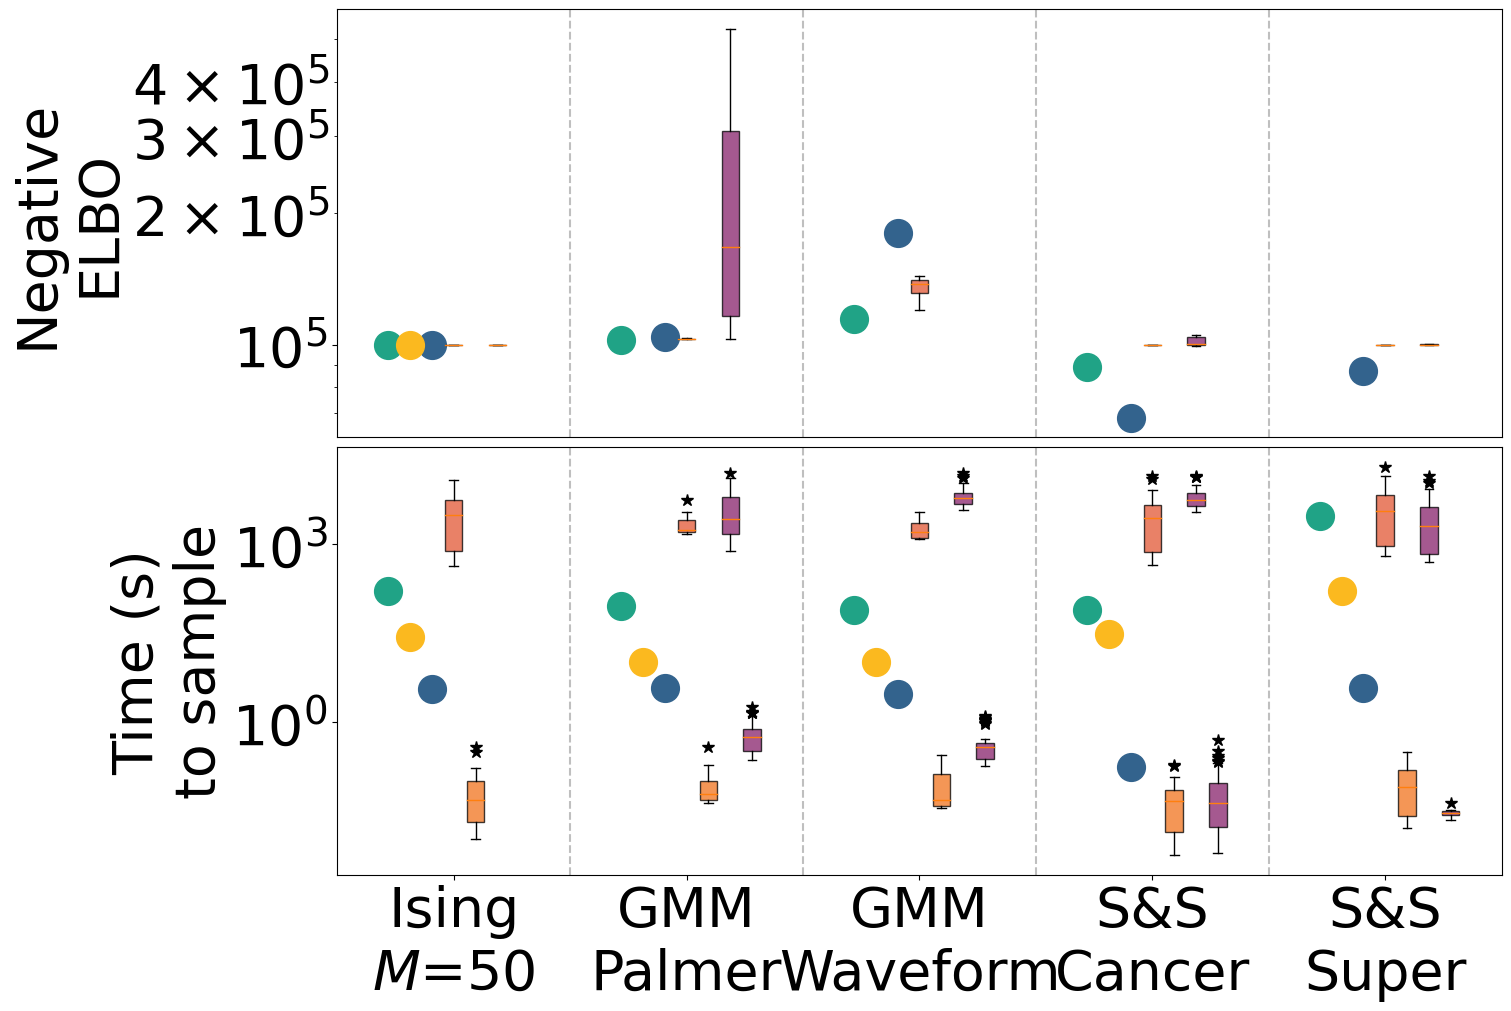

In [96]:
########################
########################
#      PLOTTING       #
########################
########################

# settings
fig, axs = plt.subplots(2,1, figsize=(15,10), constrained_layout=True)

increase=2
offset=0.25
marker_size=400

mad_offset=-2.25
gibbs_offset=-1.5
meanfield_offset=-0.75
dequant_offset=0.
dequant_density_offset=0.75
concrete_offset=1.5
concrete_density_offset=2.25

########################
########################
#      elbos plot      #
########################
########################

#concrete_tmp=np.copy(concrete_elbos[4,:])
#concrete_tmp=concrete_tmp[-concrete_tmp<np.inf]
#bps=[axs[0].boxplot(-concrete_tmp,positions=[1*increase+concrete_offset*offset],
#                                        patch_artist=True, flierprops=flierprops)]


bps = [None for i in range(5)]
dequant_bps = [None for i in range(5)]
drift = 1e5
for i in range(5):
    if i<4: axs[0].scatter([i*increase+mad_offset*offset],[drift-madmix_elbos[i+4]],s=marker_size,c='#20A386FF')
    axs[0].scatter([i*increase+meanfield_offset*offset],[drift-meanfield_elbos[i+4]],s=marker_size,c='#33638D')
    if i==0: axs[0].scatter([i*increase+gibbs_offset*offset],[drift-gibbs_elbos[i+4]],s=marker_size,c='#FBB91FFF')
    
    dequant_tmp=np.copy(dequant_elbos[i+4,:])
    dequant_tmp=dequant_tmp[-dequant_tmp<5*1e5]
    dequant_bps[i]=axs[0].boxplot(drift-dequant_tmp,positions=[i*increase+dequant_offset*offset],
                                  patch_artist=True, flierprops=flierprops, showfliers=False)
        
    if i!=0 or i!=2:
        concrete_tmp=np.copy(concrete_elbos[i+3,:])
        concrete_tmp=concrete_tmp[-concrete_tmp<5*1e5]
        bps[i]=axs[0].boxplot(drift-concrete_tmp,positions=[i*increase+concrete_offset*offset], 
                              patch_artist=True, flierprops=flierprops, showfliers=False)
# end for



# fill concrete boxplots with colors
colors = ['#87216BFF' for i in range(2)]
i=0
for bplot in (bps[1],bps[3],bps[4]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Concrete')
        i=i+1
    # end for
# end for


# fill dequantization boxplots with colors
colors = ['#E25734' for i in range(5)]
i=0
for bplot in (dequant_bps[0],dequant_bps[1],dequant_bps[2],dequant_bps[3],dequant_bps[4]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Dequantization')
        i=i+1
# end for

axs[0].set_ylabel('Negative\nELBO')
axs[0].set_yscale('log')
axs[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off


########################
########################
#    cpu times plot    #
########################
########################
plt.rcParams["legend.framealpha"]=1
plt.rcParams["legend.edgecolor"]='black'
#bps = [axs[1].boxplot(concrete_cput_gmm_pg,positions=[1*increase+concrete_offset*offset], 
#                      patch_artist=True, flierprops=flierprops), 
#       axs[1].boxplot(concrete_cput_gmm_wf,positions=[2*increase+concrete_offset*offset], 
#                      patch_artist=True, flierprops=flierprops)]

bps = [None for i in range(4)]
bpsbis = [None for i in range(4)]

dequant_bps = [None for i in range(5)]
dequant_bpsbis = [None for i in range(5)]

for i in range(5):
    axs[1].scatter([i*increase+mad_offset*offset],[madmix_cput[i+4]],s=marker_size,c='#20A386FF',
                   label='Mad Mix (ours)' if i == 0 else '')
    axs[1].scatter([i*increase+gibbs_offset*offset],[gibbs_cput[i+4]],s=marker_size,c='#FBB91FFF',
                   label='Gibbs' if i == 0 else '')
    axs[1].scatter([i*increase+meanfield_offset*offset],[meanfield_cput[i+4]],s=marker_size,c='#33638D',
                   label='Mean-field' if i == 0 else '')
    
    if i>0:
        concrete_tmp=np.copy(concrete_cput[i+2,:])
        concrete_tmp=concrete_tmp[concrete_tmp>0]
        bps[i-1]=axs[1].boxplot(concrete_tmp,positions=[i*increase+concrete_offset*offset], 
                              patch_artist=True, flierprops=flierprops)
        concrete_tmp=np.copy(concrete_density_cput[i+3,:])
        concrete_tmp=concrete_tmp[concrete_tmp>0]
        bpsbis[i-1]=axs[1].boxplot(concrete_tmp,positions=[i*increase+concrete_density_offset*offset], 
                                         patch_artist=True, flierprops=flierprops)
    # end if
    
    
    dequant_tmp=np.copy(dequant_cput[i+4,:])
    dequant_tmp=dequant_tmp[dequant_tmp>0]
    dequant_bps[i]=axs[1].boxplot(dequant_tmp,positions=[i*increase+dequant_offset*offset], 
                                  patch_artist=True, flierprops=flierprops)
    dequant_tmp=np.copy(dequant_density_cput[i+4,:])
    dequant_tmp=dequant_tmp[dequant_tmp>0]
    dequant_bpsbis[i]=axs[1].boxplot(dequant_tmp,positions=[i*increase+dequant_density_offset*offset], 
                                     patch_artist=True, flierprops=flierprops)
# end for

# fill dequantization boxplots with colors
colors = ['#E25734' for i in range(5)]
i=0
for bplot in (dequant_bps[0],dequant_bps[1],dequant_bps[2],dequant_bps[3],dequant_bps[4]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Dequantization')
        i=i+1
# end for


# fill dequantization subsequent boxplots with colors
colors = ['#F1731D' for i in range(5)]
i=0
for bplot in (dequant_bpsbis[0],dequant_bpsbis[1],dequant_bpsbis[2],dequant_bpsbis[3],dequant_bpsbis[4]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Dequantization\n(subsequent)')
        i=i+1
# end for

# fill concrete boxplots with colors
colors = ['#87216BFF' for i in range(4)]
i=0
for bplot in (bps[0],bps[1],bps[2],bps[3]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Concrete')
        i=i+1
    # end for
# end for

# fill concrete boxplots with colors
colors = ['#87216BFF' for i in range(4)]
i=0
for bplot in (bpsbis[0],bpsbis[1],bpsbis[2],bpsbis[3]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Concrete')
        i=i+1
    # end for
# end for

axs[1].set_ylabel('Time (s)\nto sample')
axs[1].set_yscale('log')
axs[1].set_xticks(ticks=[0,increase,2*increase,3*increase,4*increase],
                  labels=['Ising\n$M$=50','GMM\nPalmer','GMM\nWaveform','S&S\nCancer','S&S\nSuper']);


# add vertical lines
for i in range(4): # vline
    for j in range(2): # axis
        axs[j].axvline(x=i*increase + increase/2,c='grey',alpha=0.5,ls='dashed')
    # end for
# end for

# set xlim to be the same
diff = 0.5*(increase+mad_offset*offset-concrete_density_offset*offset)
for j in range(2): axs[j].set_xlim(mad_offset*offset-diff,
                                   4*increase+concrete_density_offset*offset+diff)


handles, labels = axs[1].get_legend_handles_labels()
#fig.legend(handles, labels, bbox_to_anchor=(0, 1.02, 1, 0.2), 
#           loc="lower left",mode="expand", borderaxespad=0, ncol=4, fontsize=26)
#plt.savefig(fig_path+'summary_both_cont.pdf', dpi=300, bbox_inches='tight')

In [ ]:
plt.rcParams.update({'font.size': 40})
fig, axs = plt.subplots(2, 5, figsize=(20,10), constrained_layout=True)


########################
########################
#       settings       #
########################
########################

offset=0.25
marker_size=400

mad_offset=-2.25
gibbs_offset=-1.5
meanfield_offset=-0.75
dequant_offset=0.
dequant_density_offset=0.75
concrete_offset=1.5
concrete_density_offset=2.25
diff = concrete_density_offset-concrete_offset


########################
########################
#      elbos plot      #
########################
########################

# set drifts
drift = np.zeros(5)
drift[0] = 300
drift[3] = 1e5
drift[4] = 0.95*1e13

# set yticks mins and maxs
mins = [1,1,1,1,1]
maxs = [3,3,3,3,3]

bps = [None for j in range(5)]
dequant_bps = [None for j in range(5)]
for j in range(5): # move across columns, i.e., experiments
    axs[0,j].scatter([mad_offset*offset],[drift[j]-madmix_elbos[j+4]],s=marker_size,c='#20A386FF')
    axs[0,j].scatter([meanfield_offset*offset],[drift[j]-meanfield_elbos[j+4]],s=marker_size,c='#33638D')
    if j==0: axs[0,j].scatter([gibbs_offset*offset],[drift[j]-gibbs_elbos[j+4]],s=marker_size,c='#FBB91FFF')
        
    dequant_tmp=np.copy(dequant_elbos[j+4,:])
    dequant_tmp=dequant_tmp[-dequant_tmp<5*1e5]
    dequant_bps[j]=axs[0,j].boxplot(drift[j]-dequant_tmp,positions=[dequant_offset*offset],
                                  patch_artist=True, flierprops=flierprops, showfliers=True)
    
    if j not in [0,2]:
        concrete_tmp=np.copy(concrete_elbos[j+3,:])
        concrete_tmp=concrete_tmp[-concrete_tmp<5*1e5]
        bps[j]=axs[0,j].boxplot(drift[j]-concrete_tmp,positions=[concrete_offset*offset], 
                              patch_artist=True, flierprops=flierprops, showfliers=True)
        
    # axis settings
    if j==0: axs[0,j].set_ylim(bottom=20,top=1000)
    if j==2: axs[0,j].set_ylim(bottom=1e4-10,top=1e5+10)
    if j==3: axs[0,j].set_ylim(bottom=5*1e4,top=1e6+10)
    if j==4: axs[0,j].set_ylim(bottom=9e12-10,top=1.1*1e13)
    axs[0,j].set_xlim((mad_offset-diff)*offset,(concrete_density_offset+diff)*offset)
    axs[0,j].set_yscale('log')
    axs[0,j].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    if j<4: axs[0,j].yaxis.set_major_locator(plt.LogLocator(base=10, numticks=maxs[j]))
    axs[0,j].yaxis.set_minor_locator(plt.LogLocator(base=10, numticks=mins[j]))
    if j==4: axs[0,j].set_yticks(ticks=[9*1e12,1e13], labels=['9x10¹²','10¹³'])
# end for

# fill concrete boxplots with colors
colors = ['#87216BFF' for j in range(2)]
i=0
for bplot in (bps[1],bps[3],bps[4]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Concrete')
        i=i+1
    # end for
# end for


# fill dequantization boxplots with colors
colors = ['#E25734' for j in range(5)]
i=0
for bplot in (dequant_bps[0],dequant_bps[1],dequant_bps[2],dequant_bps[3],dequant_bps[4]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Dequantization')
        i=i+1
# end for

axs[0,0].set_ylabel('Negative\nELBO')



########################
########################
#    cpu times plot    #
########################
########################

plt_labels = ['Ising\n$M$=50','GMM\nPenguins','GMM\nWaveform','S&S\nCancer','S&S\nSuper']

bps = [None for j in range(4)]
bpsbis = [None for j in range(4)]
dequant_bps = [None for j in range(5)]
dequant_bpsbis = [None for j in range(5)]

for j in range(5): # move across columns, i.e., experiments
    axs[1,j].scatter([mad_offset*offset],[madmix_cput[j+4]],s=marker_size,c='#20A386FF',
                   label='Mad Mix (ours)' if j == 0 else '')
    axs[1,j].scatter([gibbs_offset*offset],[gibbs_cput[j+4]],s=marker_size,c='#FBB91FFF',
                   label='Gibbs' if j == 0 else '')
    axs[1,j].scatter([meanfield_offset*offset],[meanfield_cput[j+4]],s=marker_size,c='#33638D',
                   label='Mean-field' if j == 0 else '')
    
    if j>0:
        concrete_tmp=np.copy(concrete_cput[j+3,:])
        concrete_tmp=concrete_tmp[concrete_tmp>0]
        bps[j-1]=axs[1,j].boxplot(concrete_tmp,positions=[concrete_offset*offset], 
                              patch_artist=True, flierprops=flierprops)
        concrete_tmp=np.copy(concrete_density_cput[j+3,:])
        concrete_tmp=concrete_tmp[concrete_tmp>0]
        bpsbis[j-1]=axs[1,j].boxplot(concrete_tmp,positions=[concrete_density_offset*offset], 
                                         patch_artist=True, flierprops=flierprops)
    # end if
    
    dequant_tmp=np.copy(dequant_cput[j+4,:])
    dequant_tmp=dequant_tmp[dequant_tmp>0]
    dequant_bps[j]=axs[1,j].boxplot(dequant_tmp,positions=[dequant_offset*offset], 
                                  patch_artist=True, flierprops=flierprops)
    dequant_tmp=np.copy(dequant_density_cput[j+4,:])
    dequant_tmp=dequant_tmp[dequant_tmp>0]
    dequant_bpsbis[j]=axs[1,j].boxplot(dequant_tmp,positions=[dequant_density_offset*offset], 
                                     patch_artist=True, flierprops=flierprops)
    
    # axis settings
    axs[1,j].set_xlim((mad_offset-diff)*offset,(concrete_density_offset+diff)*offset)
    axs[1,j].set_yscale('log')
    axs[1,j].set_xticks(ticks=[0], labels=[plt_labels[j]])
# end for

# fill dequantization boxplots with colors
colors = ['#E25734' for j in range(5)]
i=0
for bplot in (dequant_bps[0],dequant_bps[1],dequant_bps[2],dequant_bps[3],dequant_bps[4]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Dequantization')
        i=i+1
# end for


# fill dequantization subsequent boxplots with colors
colors = ['#F1731D' for j in range(5)]
i=0
for bplot in (dequant_bpsbis[0],dequant_bpsbis[1],dequant_bpsbis[2],dequant_bpsbis[3],dequant_bpsbis[4]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Dequantization\n(subsequent)')
        i=i+1
# end for

# fill concrete boxplots with colors
colors = ['#87216BFF' for j in range(4)]
i=0
for bplot in (bps[0],bps[1],bps[2],bps[3]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Concrete')
        i=i+1
    # end for
# end for

# fill concrete subsequent boxplots with colors
colors = ['#453781' for j in range(4)]
i=0
for bplot in (bpsbis[0],bpsbis[1],bpsbis[2],bpsbis[3]):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Concrete')
        i=i+1
    # end for
# end for

axs[1,0].set_ylabel('Time (s)\nto sample')
#plt.savefig(fig_path+'summary_both_cont.pdf', dpi=300, bbox_inches='tight')